In [29]:
from tensorflow.keras import datasets
cifar_mnist = datasets.cifar10
(train_images, train_labels), (test_images, test_labels)  = cifar_mnist.load_data()
class_names = ['Airplane'
                , 'Car', 'Birs', 'Cat'
                ,'Deer', 'Dog'
                ,'Frog', 'Horse'
                , 'Ship', 'Truck']

In [30]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(50000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(10000, 32, 32, 3)
10000


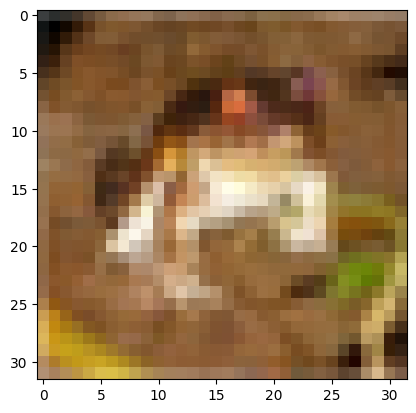

In [ ]:
# 훈련 세트에 있는 첫 번째 이미지 - 픽셀 값의 범위가 0~255 사이 확인
plt.figure()
plt.imshow(train_images[0]) #default colormap : viridis(최솟값이 보라, 최댓값이 노랑)
plt.grid(False)
plt.show()

/var/folders/wm/j89vyk052m5bvrvn1dhfyflr0000gn/T/ipykernel_96351/2354542656.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(train_labels[i])])


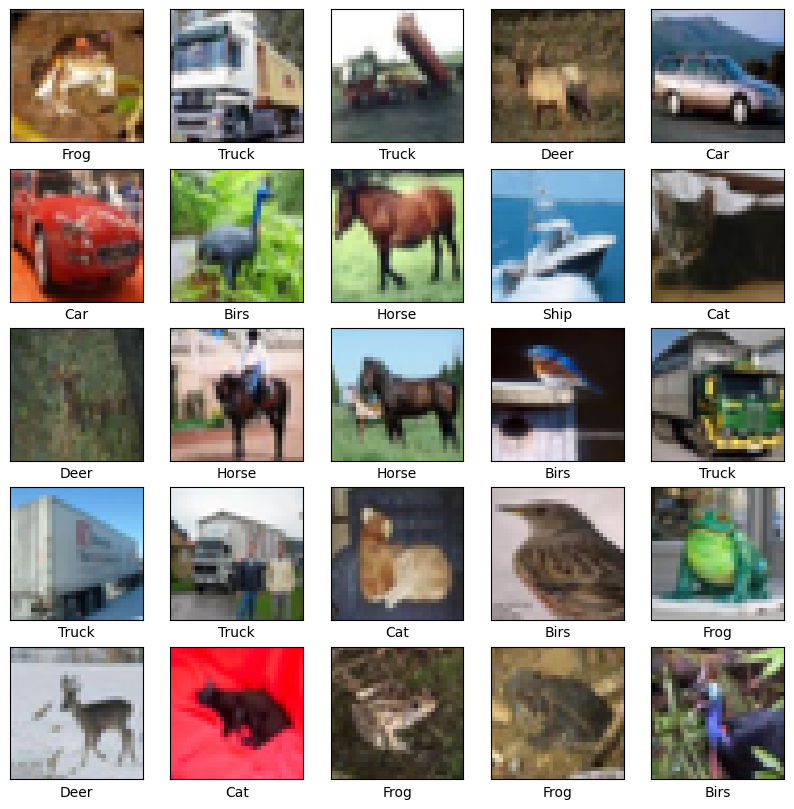

In [ ]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt. imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])

plt.show()

In [31]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt 
import numpy as np 
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np. random.seed (seed)
tf. random.set_seed (seed)

In [13]:
X_train = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32') / 255
X_test = test_images.reshape(test_images.shape[0], 32, 32, 3). astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(train_labels)
Y_test = tf.keras.utils.to_categorical(test_labels)

In [14]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten()) # Dense layer로 진입을 위해서 1차원으로 펼침
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
MODEL_DIR = 'model/' 
if not os.path.exists(MODEL_DIR):
    os.mkdir (MODEL_DIR)
modelpath="model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 1.28435, saving model to model/01-1.2843.keras

Epoch 2: val_loss improved from 1.28435 to 1.12346, saving model to model/02-1.1235.keras

Epoch 3: val_loss improved from 1.12346 to 1.02185, saving model to model/03-1.0219.keras

Epoch 4: val_loss improved from 1.02185 to 0.97396, saving model to model/04-0.9740.keras

Epoch 5: val_loss improved from 0.97396 to 0.96803, saving model to model/05-0.9680.keras

Epoch 6: val_loss improved from 0.96803 to 0.90955, saving model to model/06-0.9096.keras

Epoch 7: val_loss did not improve from 0.90955

Epoch 8: val_loss improved from 0.90955 to 0.88752, saving model to model/08-0.8875.keras

Epoch 9: val_loss improved from 0.88752 to 0.87076, saving model to model/09-0.8708.keras

Epoch 10: val_loss did not improve from 0.87076

Epoch 11: val_loss did not improve from 0.87076

Epoch 12: val_loss improved from 0.87076 to 0.86815, saving model to model/12-0.8681.keras

Epoch 13: val_loss improved from 0.86

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7004 - loss: 0.9484

 Test Accuracy: 0.7005


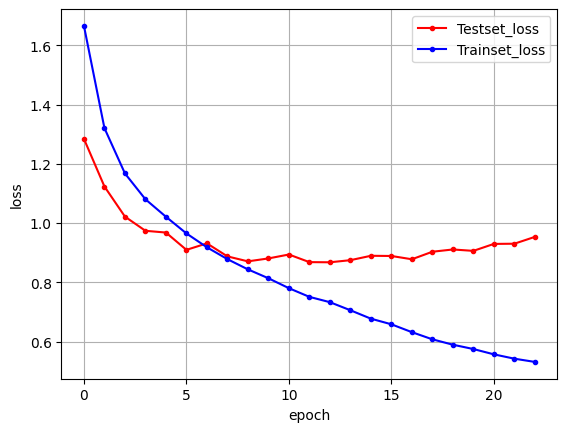

In [16]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend (loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\n테스트 정확도:', test_acc)
# 훈련된 모델을 사용하여 이미지에 대한 예측을 생성
predictions = model.predict (test_images)
# 예측 결과 출력
# print(predictions[0])
print("Prediction: ",np.argmax(predictions[0])) # 예측된 레이블 출력
print("Ground Truth", test_labels[0])# 실제 레이블 출력

313/313 - 2s - 5ms/step - accuracy: 0.7005 - loss: 0.9534

테스트 정확도: 0.7005000114440918
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Prediction:  3
Ground Truth [3]
